## Preprocessing and Training

### Installs

In [1]:
!pip install -U imbalanced-learn

In [2]:
!pip install pycaret

### Imports

In [34]:
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O
import numpy as np # data structures, mathematical functions
import matplotlib.pyplot as plt # data visulation and ploting
import seaborn as sns # data visulation and ploting

#Data preparation
from sklearn.preprocessing import StandardScaler #scale each feature/varibale to unit variance
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.dummy import DummyRegressor
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score,matthews_corrcoef,cohen_kappa_score

import pycaret
from pycaret.classification import *

from save_utils import save_file

### Load The Credit Card Data

In [4]:
credit_data = pd.read_csv('credit_data_eda.csv')

In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37097 entries, 0 to 37096
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AcountNumber               37097 non-null  int64  
 1   CVV                        37097 non-null  int64  
 2   CustomerAge                37097 non-null  float64
 3   Gender                     37097 non-null  object 
 4   MaritalStatus              37097 non-null  object 
 5   CardColour                 37097 non-null  object 
 6   CardType                   37097 non-null  object 
 7   Domain                     37097 non-null  object 
 8   Amount                     37097 non-null  float64
 9   AverageIncomeExpendicture  37097 non-null  int64  
 10  Outcome                    37097 non-null  int64  
 11  Customer_City_Address      37097 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 3.4+ MB


In [6]:
credit_data = pd.get_dummies(credit_data, columns=['Gender', 'MaritalStatus', 'CardColour', 'CardType', 'Domain', 'Customer_City_Address'])
credit_data.head()

,AcountNumber,CVV,CustomerAge,Amount,AverageIncomeExpendicture,Outcome,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,...,Domain_International,Domain_Local,Customer_City_Address_Abuja,Customer_City_Address_Enugu,Customer_City_Address_Ibadan,Customer_City_Address_Kano,Customer_City_Address_Lagos,Customer_City_Address_Ota,Customer_City_Address_Other,Customer_City_Address_Port Harcourt
0,1275734409,364,28.0,-1.615259,170919,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0
1,1271246193,401,25.0,0.092558,329353,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1242290165,266,21.0,-1.379350,292922,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
3,1245478185,402,26.0,-1.610989,145444,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,1258212072,334,28.0,0.517538,295990,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


### Train/Test Split

In [7]:
X = credit_data.drop('Outcome', axis = 1)
y = credit_data['Outcome']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

### Training Data Mean Predictor

Using to dummy regressor to fit on the training data.

In [9]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[0.73783337]])

In [10]:
fradulent_training = sum(y_train)
fradulent_training_pct = sum(y_train)/len(y_train)*100
fradulent_testing = sum(y_test)
fradulent_testing_pct = sum(y_test)/len(y_test)*100
print("There are {} fradulent transactions in this training set, which is {:2f}% of all transactions.\nThere are {} fradulent transactions in this testing set, which is {:2f}% of all transactions.".format(fradulent_training, fradulent_training_pct,
                                                                                                                                                                                                            fradulent_testing, fradulent_testing_pct))

There are 20528 fradulent transactions in this training set, which is 73.783337% of all transactions.
There are 6842 fradulent transactions in this testing set, which is 73.768194% of all transactions.


In [11]:
y_train.value_counts()

1    20528
0     7294
Name: Outcome, dtype: int64

In [12]:
y.value_counts()

1    27370
0     9727
Name: Outcome, dtype: int64

### Undersampling

In [13]:
X_train_1, y_train_1 = make_imbalance(X_train, y_train, sampling_strategy={0: 7000, 1: 7000}, random_state = 1)


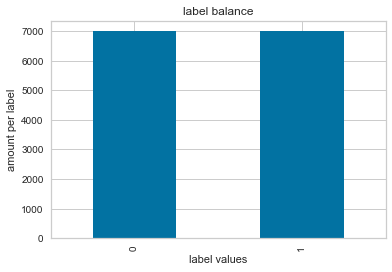

In [14]:
y_train_1.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

### Oversampling

In [15]:
X_train.dtypes

AcountNumber                             int64
CVV                                      int64
CustomerAge                            float64
Amount                                 float64
AverageIncomeExpendicture                int64
Gender_Female                            uint8
Gender_Male                              uint8
MaritalStatus_Divorced                   uint8
MaritalStatus_Married                    uint8
MaritalStatus_Single                     uint8
MaritalStatus_Unknown                    uint8
CardColour_Gold                          uint8
CardColour_White                         uint8
CardType_MasterCard                      uint8
CardType_Verve                           uint8
CardType_Visa                            uint8
Domain_International                     uint8
Domain_Local                             uint8
Customer_City_Address_Abuja              uint8
Customer_City_Address_Enugu              uint8
Customer_City_Address_Ibadan             uint8
Customer_City

In [16]:
smote = SMOTE(random_state = 1)
X_train_3, y_train_3 = smote.fit_resample(X_train, y_train)

In [17]:
y_train_3.value_counts()

1    20528
0    20528
Name: Outcome, dtype: int64

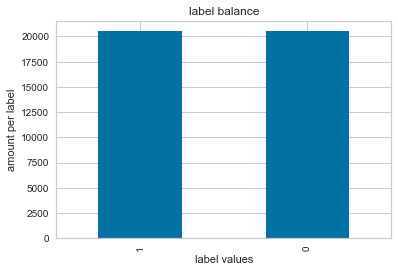

In [18]:
y_train_3.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

### Evaluation Metrics

In [19]:
def evaluation_model(model,X_test,y_test):
  pred = model.predict(X_test)
  print("Accuarcy Score: {:.2f}\n Recall Score: {:.2f}\n F1 Score: {:.2f}\n AUC Score: {:.2f}\n Kappa Score: {:.2f}\n MCC Score: {:.2f}".format(accuracy_score(y_test,pred), recall_score(y_test,pred),
                                                                                                                                            f1_score(y_test,pred), roc_auc_score(y_test,pred),
                                                                                                                                            cohen_kappa_score(y_test,pred),matthews_corrcoef(y_test,pred)))

### Model Training With Model Performance

Logistic Regression with undersampling data

In [20]:
log_model = LogisticRegression().fit(X_train_1, y_train_1)

In [21]:
evaluation_model(log_model, X_test, y_test)

Accuarcy Score: 0.26
 Recall Score: 0.00
 F1 Score: 0.00
 AUC Score: 0.50
 Kappa Score: 0.00
 MCC Score: 0.00


Logistic Regression with overrsampling data

In [22]:
log_model = LogisticRegression().fit(X_train_3, y_train_3)

In [23]:
evaluation_model(log_model, X_test, y_test)

Accuarcy Score: 0.26
 Recall Score: 0.00
 F1 Score: 0.00
 AUC Score: 0.50
 Kappa Score: 0.00
 MCC Score: 0.00


Decision Tree Classification with undersampling data

In [24]:
tree_model = DecisionTreeClassifier().fit(X_train_1,y_train_1)

In [25]:
evaluation_model(tree_model, X_test, y_test)

Accuarcy Score: 0.85
 Recall Score: 0.86
 F1 Score: 0.90
 AUC Score: 0.85
 Kappa Score: 0.65
 MCC Score: 0.66


Decision Tree Classification with oversampling data

In [26]:
tree_model = DecisionTreeClassifier().fit(X_train_3,y_train_3)

In [27]:
evaluation_model(tree_model, X_test, y_test)

Accuarcy Score: 0.85
 Recall Score: 0.89
 F1 Score: 0.90
 AUC Score: 0.81
 Kappa Score: 0.61
 MCC Score: 0.61


### PyCaret - Training multiple models simultaneously while comparing their model performances

In [44]:
classify = setup(data = credit_data, target = 'Outcome', fix_imbalance = True)

,Description,Value
0,Session id,5467
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(37097, 27)"
4,Transformed data shape,"(49446, 27)"
5,Transformed train set shape,"(38316, 27)"
6,Transformed test set shape,"(11130, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [45]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8641,0.9456,0.8472,0.9643,0.9019,0.6836,0.6991,3.9780
lightgbm,Light Gradient Boosting Machine,0.8624,0.9458,0.8651,0.9437,0.9027,0.6692,0.6767,0.8850
rf,Random Forest Classifier,0.8605,0.9447,0.8798,0.9274,0.9030,0.6555,0.6584,2.0750
ada,Ada Boost Classifier,0.8525,0.9381,0.8670,0.9284,0.8966,0.6402,0.6449,1.3450
et,Extra Trees Classifier,0.8516,0.9370,0.8993,0.8996,0.8994,0.6166,0.6166,1.9570
dt,Decision Tree Classifier,0.8499,0.8089,0.8951,0.9008,0.8979,0.6143,0.6144,0.5500
qda,Quadratic Discriminant Analysis,0.8277,0.9133,0.8431,0.9231,0.8785,0.5743,0.5964,0.5180
ridge,Ridge Classifier,0.8190,0.0000,0.7839,0.9642,0.8647,0.6001,0.6301,0.5090
lda,Linear Discriminant Analysis,0.8190,0.9220,0.7839,0.9642,0.8647,0.6001,0.6301,0.5810
knn,K Neighbors Classifier,0.5546,0.5373,0.5880,0.7541,0.6607,0.0405,0.0432,6.1200


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=5467, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Gradient Boosting Classification with oversampling data

In [46]:
grad_model = GradientBoostingClassifier().fit(X_train_3,y_train_3)

In [47]:
evaluation_model(grad_model, X_test, y_test)

Accuarcy Score: 0.86
 Recall Score: 0.85
 F1 Score: 0.90
 AUC Score: 0.87
 Kappa Score: 0.67
 MCC Score: 0.68


Gradient Boosting Classification with undersampling data

In [36]:
grad_model = GradientBoostingClassifier().fit(X_train_1,y_train_1)

In [37]:
evaluation_model(grad_model, X_test, y_test)

Accuarcy Score: 0.86
 Recall Score: 0.81
 F1 Score: 0.90
 AUC Score: 0.91
 Kappa Score: 0.69
 MCC Score: 0.73
